Mounted at /content/drive


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, ZeroPadding2D
from glob import glob

In [4]:
train = ImageDataGenerator(rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)
validation = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory('dataset/train_dog/',
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical'
                                         )
validation_dataset = validation.flow_from_directory('dataset/valid_dog/',
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical')
test_dataset = train.flow_from_directory('dataset/test1_dog/',
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical'
                                         )

Found 620 images belonging to 4 classes.
Found 61 images belonging to 4 classes.
Found 26 images belonging to 4 classes.


In [5]:
train_dataset.class_indices

{'Chihuahua': 0, 'Doberman': 1, 'Samoyed': 2, 'chow': 3}

In [6]:
model = Sequential()

model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

model.add(Flatten())

model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))

model.add(Dropout(0.4))

model.add(Dense(4096))
model.add(Activation('relu'))

model.add(Dropout(0.4))
 
model.add(Dense(4))

model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 27, 27, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                    

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']
             )

In [ ]:
model_fit = model.fit(train_dataset,
                     epochs = 20,
                     validation_data = validation_dataset)

Epoch 1/20
20/20 [==============================] - 180s 9s/step - loss: 4.3997 - accuracy: 0.3984 - val_loss: 308.0207 - val_accuracy: 0.4426
Epoch 2/20
20/20 [==============================] - 105s 5s/step - loss: 1.8166 - accuracy: 0.4629 - val_loss: 196.2032 - val_accuracy: 0.2459
Epoch 3/20
20/20 [==============================] - 105s 5s/step - loss: 1.3980 - accuracy: 0.5306 - val_loss: 33.9398 - val_accuracy: 0.3607
Epoch 4/20
20/20 [==============================] - 105s 5s/step - loss: 1.2688 - accuracy: 0.5710 - val_loss: 9.4476 - val_accuracy: 0.3607
Epoch 5/20
20/20 [==============================] - 105s 5s/step - loss: 1.2077 - accuracy: 0.5806 - val_loss: 8.6080 - val_accuracy: 0.4098
Epoch 6/20
20/20 [==============================] - 105s 5s/step - loss: 1.0889 - accuracy: 0.6355 - val_loss: 1.5867 - val_accuracy: 0.5902
Epoch 7/20
20/20 [==============================] - 105s 5s/step - loss: 1.0670 - accuracy: 0.6323 - val_loss: 1.5150 - val_accuracy: 0.6230
Epoch 8/

In [8]:
new_model = tf.keras.models.load_model('/dataset/dog_alexnet_model.h5')


[[0. 0. 0. 1.]]
chow


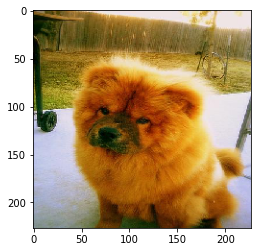

In [9]:
import numpy as np

im_test = image.load_img("/dataset/onetest/11.jpg",target_size = (227, 227))
plt.imshow(im_test)



X= image.img_to_array(im_test)
X=np.expand_dims(X,axis=0)
images = np.vstack([X])

val = new_model.predict(images)
print(val)
       
if val[0][0] == 1:
    print("chihuahua")
elif val[0][1] == 1:
    print("doberman")
elif val[0][2] == 1:
    print("samoyed")
elif val[0][3] == 1:
    print("chow")
else:
    print("nothing")

In [ ]:
model.save('/dataset/dog_alexnet_model.h5')